In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../input/intro2ml-kpfu-1/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
h_sales= train[['SalePrice','LotArea','1stFlrSF','OverallQual','GarageArea','YearBuilt','TotalBsmtSF','2ndFlrSF',]]
h_sales.head()

,SalePrice,LotArea,1stFlrSF,OverallQual,GarageArea,YearBuilt,TotalBsmtSF,2ndFlrSF
0,208500,8450,856,7,548,2003,856,854
1,181500,9600,1262,6,460,1976,1262,0
2,223500,11250,920,7,608,2001,920,866
3,140000,9550,961,7,642,1915,756,756
4,250000,14260,1145,8,836,2000,1145,1053


In [4]:
h_sales.isnull().sum()

SalePrice      0
LotArea        0
1stFlrSF       0
OverallQual    0
GarageArea     0
YearBuilt      0
TotalBsmtSF    0
2ndFlrSF       0
dtype: int64

In [5]:
# h_sales = h_sales.fillna(h_sales.mean ()) #заменим nane значения средним

Обработка данных

In [6]:
n = len(h_sales)
# n - количество объектов
m = len(h_sales.drop('SalePrice', axis=1).columns)
# m - количество признаков(колонок)
y = h_sales['SalePrice'].values.reshape((n, 1)) #транспонируем строку(массив) с ценами
X = h_sales.drop('SalePrice',  axis=1).values.reshape((n, m))
X

array([[ 8450,   856,     7, ...,  2003,   856,   854],
       [ 9600,  1262,     6, ...,  1976,  1262,     0],
       [11250,   920,     7, ...,  2001,   920,   866],
       ...,
       [ 9042,  1188,     7, ...,  1941,  1152,  1152],
       [ 9717,  1078,     5, ...,  1950,  1078,     0],
       [ 9937,  1256,     5, ...,  1965,  1256,     0]])

In [7]:
X = np.hstack((np.ones((n, 1)), X)) #расширим матрицу признаков сложив с единичной
X

array([[1.000e+00, 8.450e+03, 8.560e+02, ..., 2.003e+03, 8.560e+02,
        8.540e+02],
       [1.000e+00, 9.600e+03, 1.262e+03, ..., 1.976e+03, 1.262e+03,
        0.000e+00],
       [1.000e+00, 1.125e+04, 9.200e+02, ..., 2.001e+03, 9.200e+02,
        8.660e+02],
       ...,
       [1.000e+00, 9.042e+03, 1.188e+03, ..., 1.941e+03, 1.152e+03,
        1.152e+03],
       [1.000e+00, 9.717e+03, 1.078e+03, ..., 1.950e+03, 1.078e+03,
        0.000e+00],
       [1.000e+00, 9.937e+03, 1.256e+03, ..., 1.965e+03, 1.256e+03,
        0.000e+00]])

**Реализуем градиентный спуск**

In [8]:
def grad(y, X, theta):  #функция град. спуска в векторном виде
    n = y.shape[0]
    return 1/n * X.transpose() @ (X @ theta - y)

def L(y, X, theta):  #функция потерь ^2 для многомерного случая
    n = y.shape[0]  
    return 1/(2*n)*np.sum(np.power(X @ theta - y, 2))


def fit(y, X, theta_0, alpha=0.001, nsteps = 100):  
    # theta_0: начальное знач-ие 
    # alpha: скорость обучения
    # nsteps: кол-во итераций
    
    theta = np.copy(theta_0)
    loss = [L(y, X, theta)]
    for i in range(nsteps):
        theta -= alpha*grad(y, X, theta)   #обновление параметра theta 
        loss.append(L(y, X, theta))
    return loss, theta

In [9]:
theta_0 = np.zeros((m + 1, 1))
loss_history, theta_best = fit(y, X, theta_0, alpha=1e-10, nsteps=10000)
theta_best

array([[2.08918694e-02],
       [1.28223083e+00],
       [3.20271825e+01],
       [1.91633717e-01],
       [1.64046650e+01],
       [4.21705927e+01],
       [3.16024863e+01],
       [1.68718757e+01]])

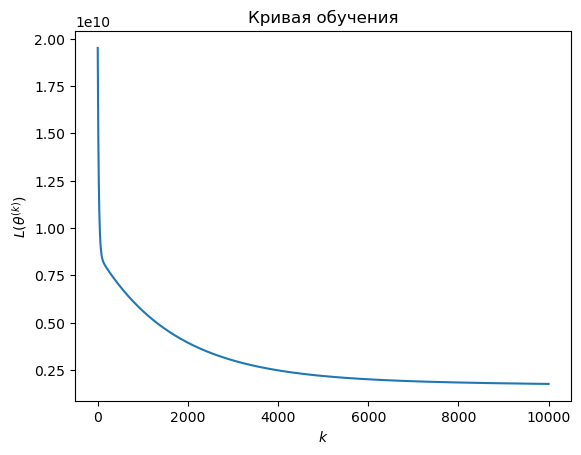

In [10]:
# Т. к в многомерном случае не представляется возможным визуализировать мгс с помощью линии уровня т.к. пространство параметров имеет размерность m+1_
# отобразим изменение значения ф. потерь в точке theta^(k) в зависимости от номера шага k
plt.plot(loss_history)
plt.xlabel('$k$')
plt.ylabel('$L(\\theta^{(k)})$')
_ = plt.title('Кривая обучения')

In [11]:
L(y, X, theta_best)

1762993649.426912

мы обучили нашу модель

In [12]:
test = pd.read_csv("../input/intro2ml-kpfu-1/test.csv")
h_testfirst= test[['Id','LotArea','1stFlrSF','OverallQual','GarageArea','YearBuilt','TotalBsmtSF','2ndFlrSF',]]
h_test= test[['LotArea','1stFlrSF','OverallQual','GarageArea','YearBuilt','TotalBsmtSF','2ndFlrSF',]]
# h_test = h_test.fillna(h_test.mean ())#уберем Nan
h_test.head()

,LotArea,1stFlrSF,OverallQual,GarageArea,YearBuilt,TotalBsmtSF,2ndFlrSF
0,11622,896,5,730.0,1961,882.0,0
1,14267,1329,6,312.0,1958,1329.0,0
2,13830,928,5,482.0,1997,928.0,701
3,9978,926,6,470.0,1998,926.0,678
4,5005,1280,8,506.0,1992,1280.0,0


In [13]:
n_test = len(h_test)
# n - количество объектов
m_test = len(h_test.columns)
# m - количество признаков(колонок)
X_test = h_test.values.reshape((n_test, m_test)) #нам тестовый набор для проверки обученной модели
X_test = np.hstack((np.ones((n_test, 1)), X_test)) #расширим матрицу признаков сложив с единичной

In [14]:
X_test.shape

(1459, 8)

In [15]:
theta_best.shape

(8, 1)

In [16]:
Y_test = X_test.dot(theta_best) # Предсказание на тренировочных данных 
len(Y_test)

Y_test = np.array(Y_test)
Y_test= Y_test.flatten().tolist ()
Y_test = np.array(Y_test)
Y_test

array([166144.7519573 , 190546.86380505, 180731.47109283, ...,
       195631.75905374, 157280.40635528, 187368.93532599])

In [17]:
len(h_testfirst['Id'])
h_testfirst['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [18]:
solution = pd.DataFrame({"id":h_testfirst['Id'].values, "SalePrice":Y_test})
solution = solution.fillna(solution.mean ())
solution.head()

,id,SalePrice
0,1461,166144.751957
1,1462,190546.863805
2,1463,180731.471093
3,1464,175122.511695
4,1465,180169.676493


In [19]:
solution.to_csv("submission.csv", index = False)